## Week 1 Lab: Introduction to R and RStudio

***

## Project Description

The Arbuthnot data set refers to Dr. John Arbuthnot, an 18th century physician, writer, and mathematician. He was interested in the ratio of newborn boys to newborn girls, so he gathered the baptism records for children born in London for every year from 1629 to 1710. 

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime
from datetime import datetime, timedelta
import scipy.stats
import pandas_profiling
from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.option_context('float_format','{:.2f}'.format)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("arbuthnot.csv")

In [3]:
df

,year,boys,girls
0,1629,5218,4683
1,1630,4858,4457
2,1631,4422,4102
3,1632,4994,4590
4,1633,5158,4839
...,...,...,...
77,1706,7952,7417
78,1707,8379,7687
79,1708,8239,7623
80,1709,7840,7380


## Exploratory Data Analysis

In [4]:
df.shape

(82, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    82 non-null     int64
 1   boys    82 non-null     int64
 2   girls   82 non-null     int64
dtypes: int64(3)
memory usage: 2.0 KB


In [6]:
df.describe()

,year,boys,girls
count,82.000000,82.000000,82.000000
mean,1669.500000,5907.097561,5534.646341
std,23.815261,1652.753629,1592.137490
min,1629.000000,2890.000000,2722.000000
25%,1649.250000,4759.250000,4457.000000
50%,1669.500000,6073.000000,5718.000000
75%,1689.750000,7576.500000,7150.250000
max,1710.000000,8426.000000,7779.000000


In [7]:
df.columns #How many variables are included in this data set 

Index(['year', 'boys', 'girls'], dtype='object')

## Data Visualization

### Univariate Data Exploration

### Time-Series Analysis

Which of the following best describes the number of girls baptised over the years included in this dataset? 

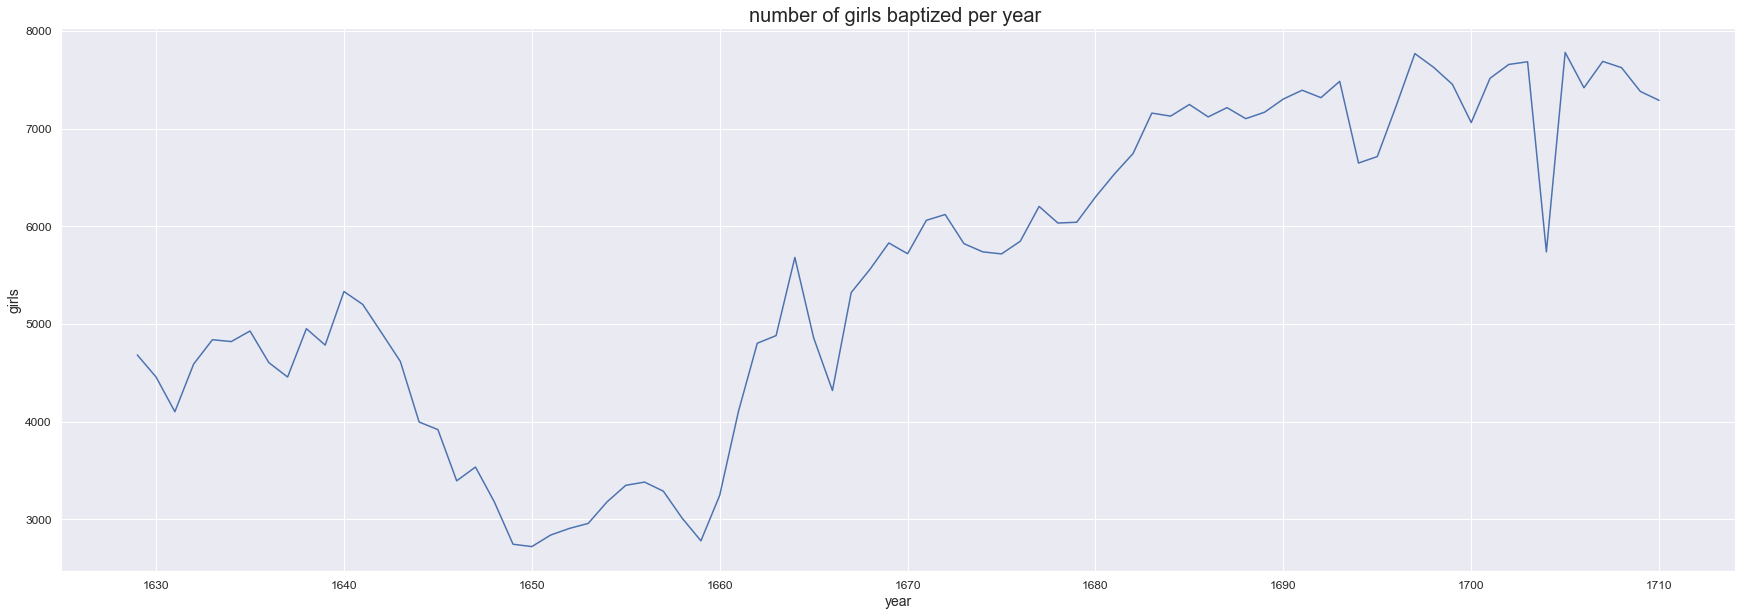

In [8]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.year,y=df.girls,data=df, estimator=None)
plt.title("number of girls baptized per year ", fontsize=20)
plt.show()

In [9]:
df["total"] = df["boys"] + df["girls"]

In [10]:
df.head()

,year,boys,girls,total
0,1629,5218,4683,9901
1,1630,4858,4457,9315
2,1631,4422,4102,8524
3,1632,4994,4590,9584
4,1633,5158,4839,9997


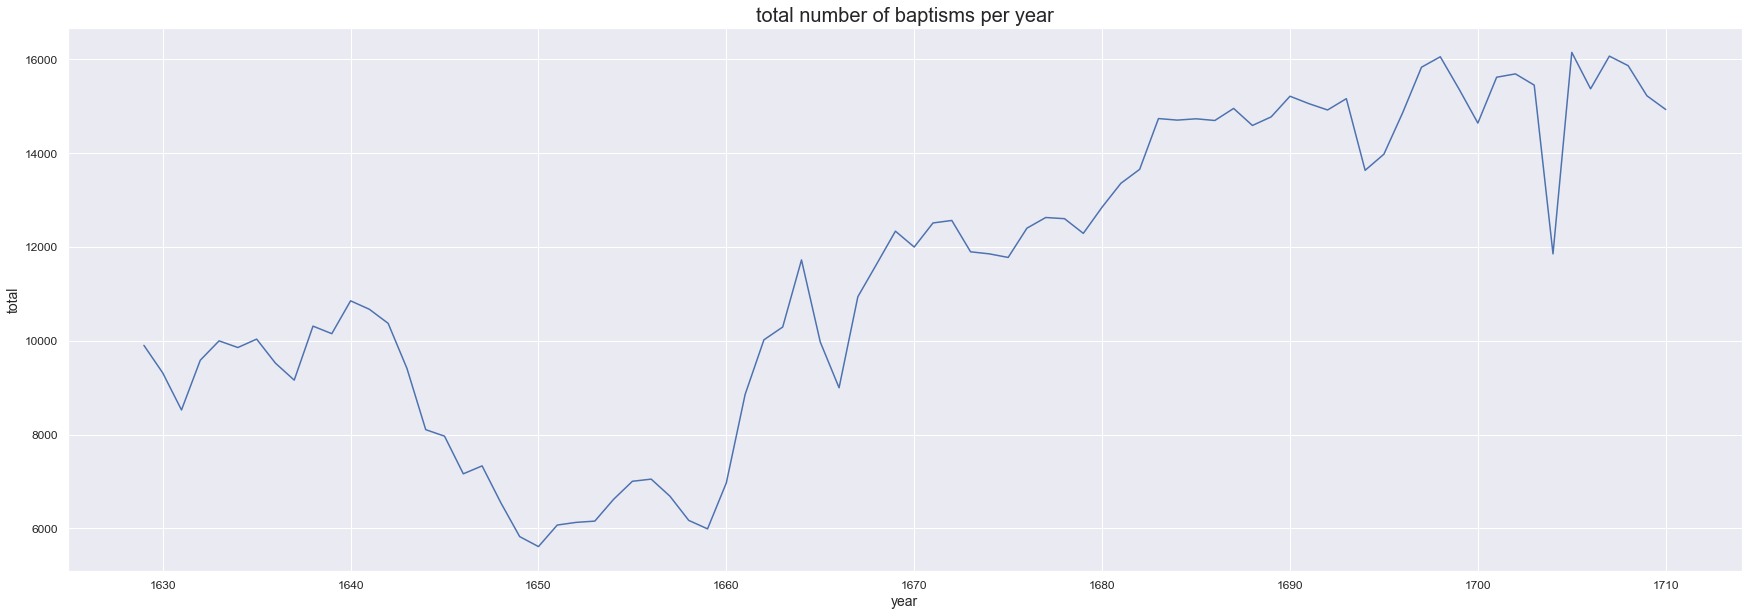

In [11]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.year,y=df.total,data=df, estimator=None)
plt.title("total number of baptisms per year", fontsize=20)
plt.show()

Calculate the total number of births for each year and store these values in a new variable called total in the present dataset. Then, calculate the proportion of boys born each year and store these values in a new variable called prop_boys in the same dataset. Plot these values over time and based on the plot determine if the following statement is true or false: The proportion of boys born in the US has decreased over time.

In [12]:
df["boysprop"] = df["boys"]/df["total"]

In [13]:
df.head()

,year,boys,girls,total,boysprop
0,1629,5218,4683,9901,0.527017
1,1630,4858,4457,9315,0.521524
2,1631,4422,4102,8524,0.518771
3,1632,4994,4590,9584,0.521077
4,1633,5158,4839,9997,0.515955


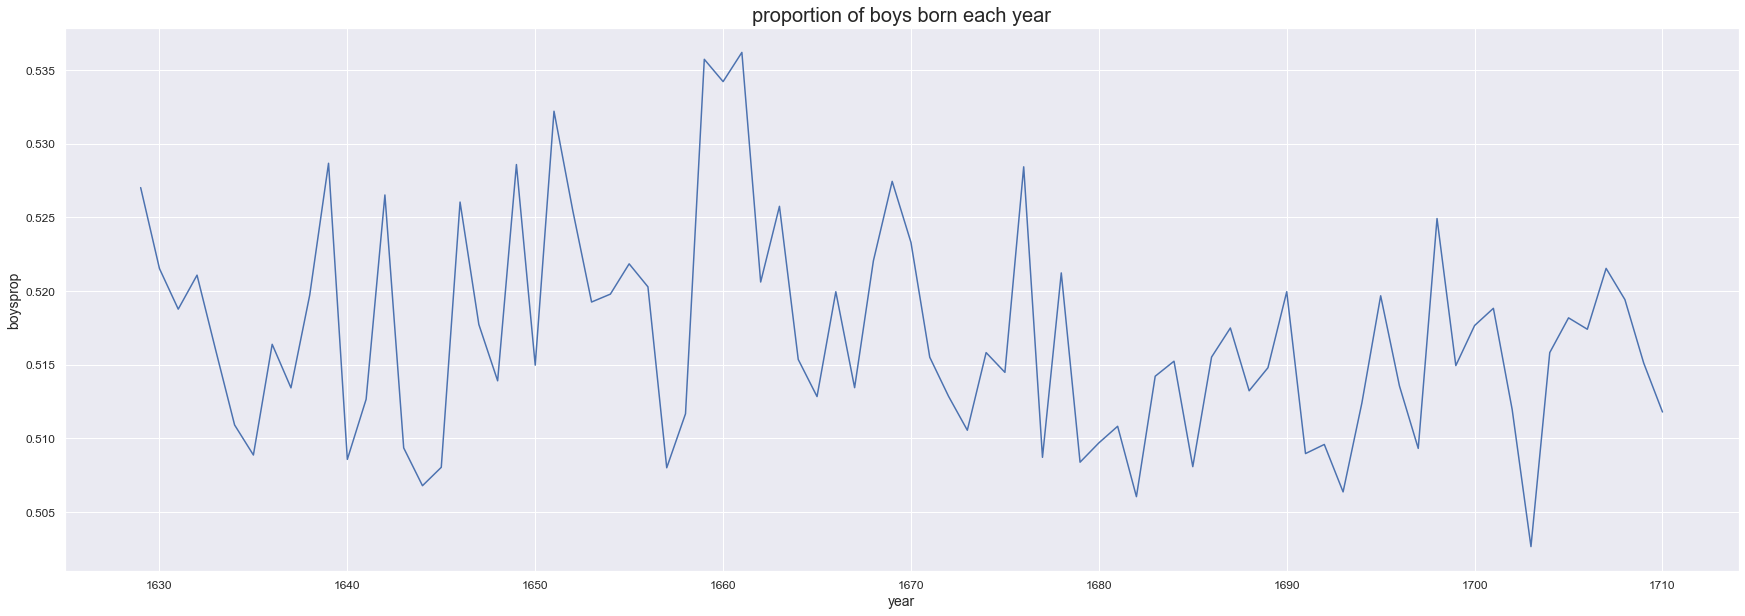

In [14]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.year,y=df.boysprop,data=df, estimator=None)
plt.title("proportion of boys born each year", fontsize=20)
plt.show()

In [15]:
df2 = pd.read_csv("present.csv") #How many variables are included in this data set?
df2.head()

,year,boys,girls
0,1940,1211684,1148715
1,1941,1289734,1223693
2,1942,1444365,1364631
3,1943,1508959,1427901
4,1944,1435301,1359499


In [16]:
#What years are included in this dataset?

df2.year.sort_values()

0     1940
1     1941
2     1942
3     1943
4     1944
      ... 
58    1998
59    1999
60    2000
61    2001
62    2002
Name: year, Length: 63, dtype: int64

Calculate the total number of births for each year and store these values in a new variable called total in the present dataset. Then, calculate the proportion of boys born each year and store these values in a new variable called prop_boys in the same dataset. Plot these values over time and based on the plot determine if the following statement is true or false: The proportion of boys born in the US has decreased over time. 

In [17]:
df2["total"] = df2["boys"] + df2["girls"]

In [18]:
df2["boysprop"] = df2["boys"]/df2["total"]

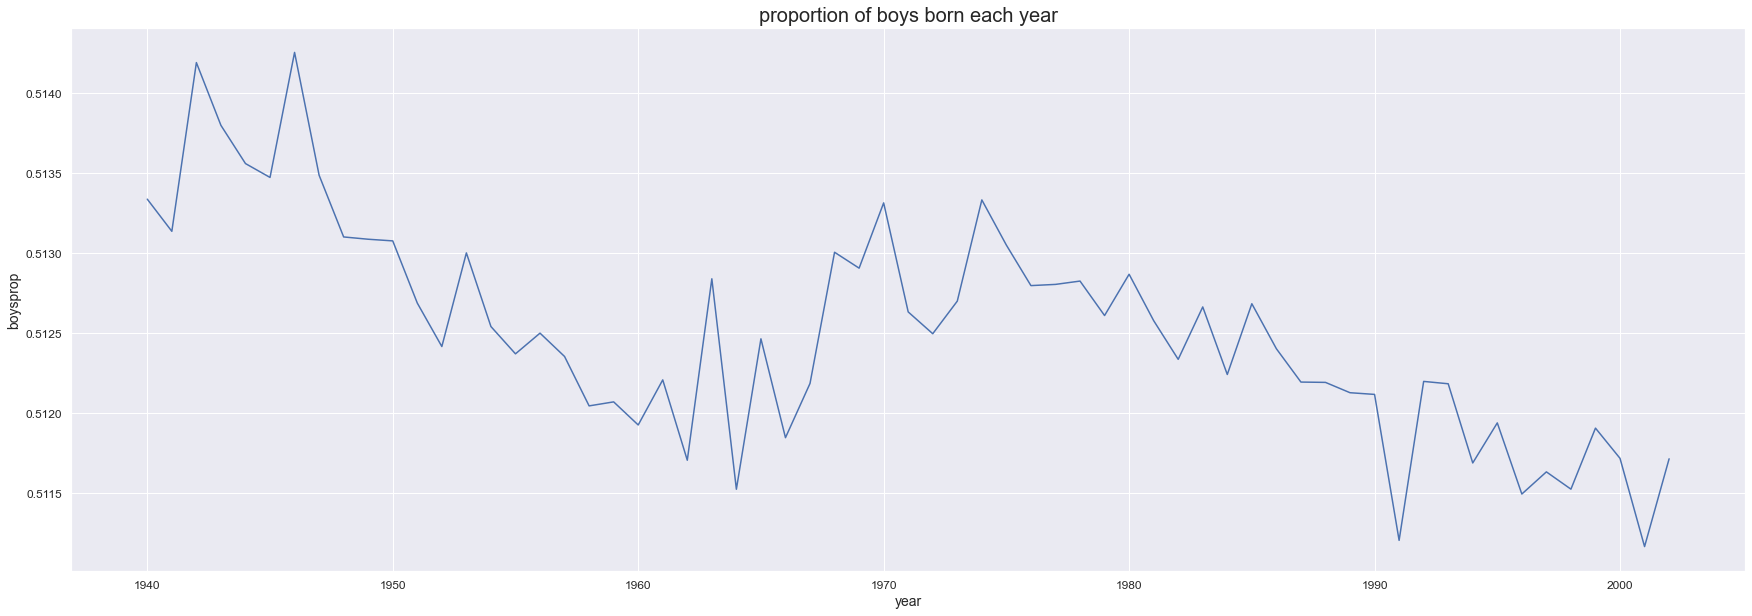

In [19]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df2.year,y=df2.boysprop,data=df, estimator=None)
plt.title("proportion of boys born each year", fontsize=20)
plt.show()

Create a new variable called more_boys which contains the value of either TRUE if that year had more boys than girls, or FALSE if that year did not. Based on this variable which of the following statements is true? 

In [20]:
df2["diff"] = df["boys"] - df["girls"]

In [21]:
df2["more_boys"] = df2["boysprop"].apply(lambda x: 1 if x > 0.5 else 0)

In [22]:
df2

,year,boys,girls,total,boysprop,diff,more_boys
0,1940,1211684,1148715,2360399,0.513339,535,1
1,1941,1289734,1223693,2513427,0.513138,401,1
2,1942,1444365,1364631,2808996,0.514193,320,1
3,1943,1508959,1427901,2936860,0.513800,404,1
4,1944,1435301,1359499,2794800,0.513561,319,1
...,...,...,...,...,...,...,...
58,1998,2016205,1925348,3941553,0.511526,523,1
59,1999,2026854,1932563,3959417,0.511907,386,1
60,2000,2076969,1981845,4058814,0.511718,437,1
61,2001,2057922,1968011,4025933,0.511166,607,1


In [23]:
df2.more_boys.value_counts()

1    63
Name: more_boys, dtype: int64

Calculate the boy-to-girl ratio each year, and store these values in a new variable called prop_boy_girl in the present dataset. Plot these values over time. 

In [24]:
df2["prop_boy_girl"] = df2["boys"] / df2["girls"]

In [25]:
df2.head()

,year,boys,girls,total,boysprop,diff,more_boys,prop_boy_girl
0,1940,1211684,1148715,2360399,0.513339,535,1,1.054817
1,1941,1289734,1223693,2513427,0.513138,401,1,1.053969
2,1942,1444365,1364631,2808996,0.514193,320,1,1.058429
3,1943,1508959,1427901,2936860,0.513800,404,1,1.056767
4,1944,1435301,1359499,2794800,0.513561,319,1,1.055757


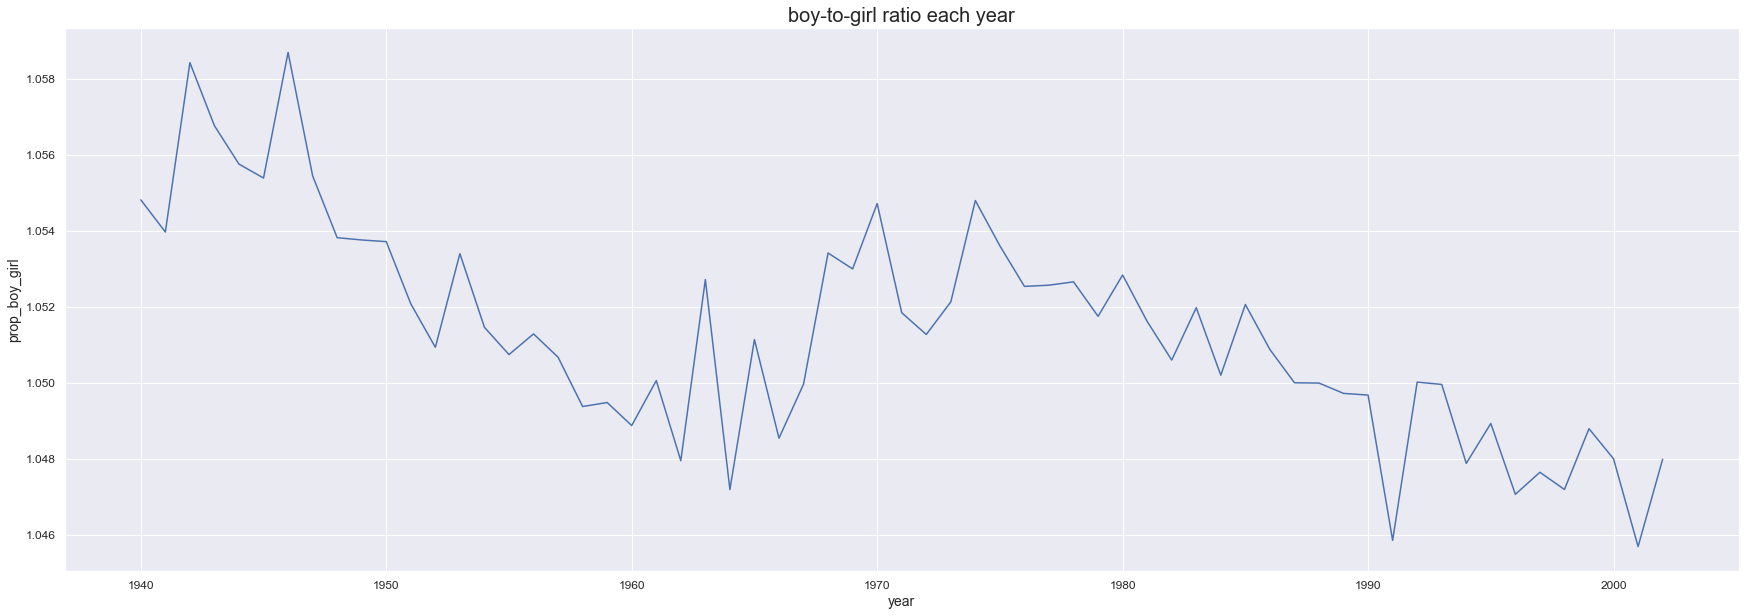

In [26]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df2.year,y=df2.prop_boy_girl,data=df, estimator=None)
plt.title("boy-to-girl ratio each year", fontsize=20)
plt.show()

In [27]:
df2.total.max()

4268326

In [28]:
df2[df2.total == 4268326] #In what year did we see the most total number of births in the U.S.?

,year,boys,girls,total,boysprop,diff,more_boys,prop_boy_girl
21,1961,2186274,2082052,4268326,0.512209,168,1,1.050057


#### Python code done by Dennis Lam